In [ ]:
!pip install pandas-profiling --upgrade

In [ ]:
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from ast import literal_eval
%matplotlib inline

## 1. Loading the data

In [ ]:
import pandas as pd
import csv
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
df_tracks=pd.read_csv('/content/drive/MyDrive/datos/tracks_mod.csv')
df_artist=pd.read_csv('/content/drive/MyDrive/datos/artists_mod.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df_tracks.shape)
print(df_artist.shape)

(586672, 20)
(1162095, 5)


#BASE DE ARTISTAS (df_artist)
ID: Es el identificador unico    ///   Type: Object (STRING) /// Tipo de dato: 

followers: Numero de Seguidores que tiene el artista /// Type: float64 /// Tipo de dato: Cuantitativa (Continua)

genres: Genero musical 


In [ ]:
df_artist.describe(include='all')

,id,followers,genres,name,popularity
count,1162095,1.162084e+06,1162095,1162095,1.162095e+06
unique,1162095,NaN,49155,1134430,NaN
top,0DheY5irMjBUeLybbCUEZ2,NaN,[],Ace,NaN
freq,1,NaN,856500,13,NaN
mean,NaN,1.022070e+04,NaN,NaN,8.795961e+00
std,NaN,2.543995e+05,NaN,NaN,1.355777e+01
min,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,1.000000e+01,NaN,NaN,0.000000e+00
50%,NaN,5.700000e+01,NaN,NaN,2.000000e+00
75%,NaN,4.170000e+02,NaN,NaN,1.300000e+01


In [ ]:
df_artist['genres']

0                        []
1                        []
2                        []
3                        []
4                        []
                 ...       
1162090    ['black comedy']
1162091                  []
1162092                  []
1162093    ['black comedy']
1162094      ['new comedy']
Name: genres, Length: 1162095, dtype: object

In [ ]:
import ast

# Aplicar ast.literal_eval() a cada fila de la columna "mi_columna"
df_artist["genres"] = df_artist["genres"].apply(ast.literal_eval)

In [ ]:
df_artist.dtypes

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object

In [ ]:
df_artist['genres']

0                      []
1                      []
2                      []
3                      []
4                      []
                ...      
1162090    [black comedy]
1162091                []
1162092                []
1162093    [black comedy]
1162094      [new comedy]
Name: genres, Length: 1162095, dtype: object

In [ ]:
df_artist["genres"].apply(lambda x: len(x) == 0)

0           True
1           True
2           True
3           True
4           True
           ...  
1162090    False
1162091     True
1162092     True
1162093    False
1162094    False
Name: genres, Length: 1162095, dtype: bool

In [ ]:
df_artist["genres"].apply(lambda x: len(x) == 0).value_counts()

True     856500
False    305595
Name: genres, dtype: int64

In [ ]:
# "Desempaquetar" las listas en la columna "mi_columna" en elementos individuales
df_exploded = df_artist.explode("genres")

In [ ]:
df_exploded["genres"].unique()

array([nan, 'carnaval cadiz', 'classical harp', ..., 'metal piauiense',
       'ugandan traditional', 'chapman stick'], dtype=object)

In [ ]:
# Contar los elementos únicos en la columna "mi_columna"
conteo_elementos = df_exploded["genres"].nunique()

# Imprimir el conteo de elementos
print(conteo_elementos)

5366


In [ ]:
df_artist.fillna("0", inplace=True)

In [ ]:
df_artist.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
df_artist["followers"].astype("float")

0             0.0
1             5.0
2             0.0
3             0.0
4             2.0
            ...  
1162090    4831.0
1162091      46.0
1162092     257.0
1162093    2357.0
1162094      40.0
Name: followers, Length: 1162095, dtype: float64

In [ ]:
df_artist["followers"]=df_artist["followers"].astype("float")

## Análisis Univariado y Bivariado

<AxesSubplot:>

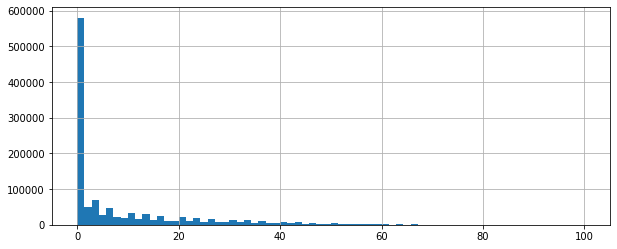

In [ ]:
# Using a histogram for showing the distribution of a column
plt.figure(figsize=(10, 4))
df_artist["popularity"].hist(bins=70)

<AxesSubplot:>

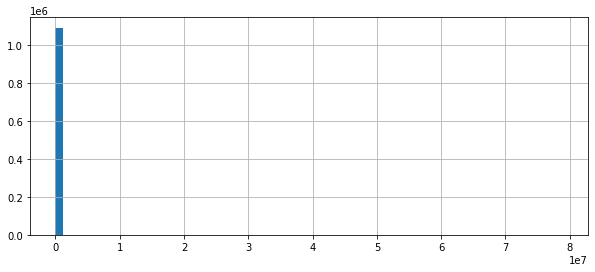

In [ ]:
# Using a histogram for showing the distribution of a column
plt.figure(figsize=(10, 4))
df_artist[df_artist["followers"]>0]["followers"].hist(bins=70)

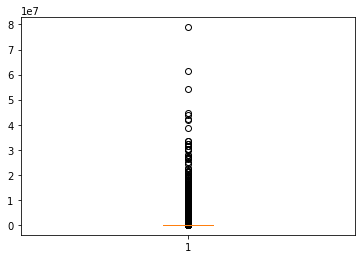

In [ ]:
plt.boxplot(df_artist["followers"])
plt.show()

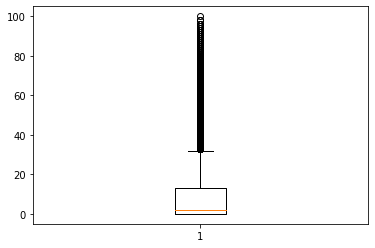

In [ ]:
plt.boxplot(df_artist["popularity"])
plt.show()

#### Correlación

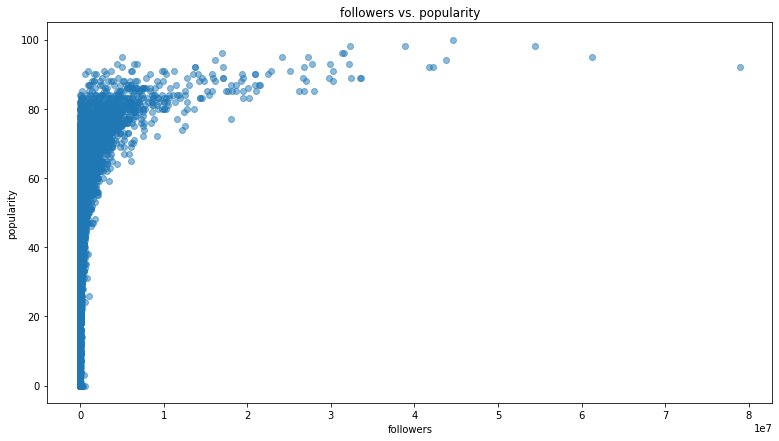

In [ ]:
# Plotting a scatter plot for two quantitative variables
plt.figure(figsize = (13, 7))
plt.scatter(df_artist['followers'], df_artist['popularity'], alpha = 0.5)
plt.title('followers vs. popularity')
plt.xlabel('followers')
plt.ylabel('popularity')
plt.show()

In [ ]:
correlaciones=df_artist.corr(method="spearman")
correlaciones

,followers,popularity
followers,1.000000,0.782235
popularity,0.782235,1.000000


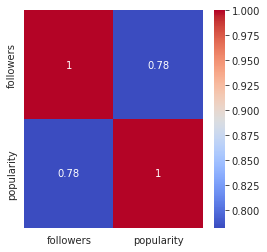

In [ ]:
# Creamos la gráfica de correlación
fig = plt.figure(figsize=(4,4))

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
# Mostramos la gráfica
plt.show()

La popularidad y el número de seguidores tienen una dirección positiva, sin embargo no es una relación lineal.

TOP DE ARTISTAS POPULARES Y
POPULARIDAD SEGUN GENERO

#BASE DE CANCIONES (df_tracks)
ID: Es el identificador unico    ///   Type: Object (STRING) /// Tipo de dato: 

followers: Numero de Seguidores que tiene el artista /// Type: float64 /// Tipo de dato: Cuantitativa (Continua)

genres: Genero musical 

In [ ]:
# Showing column types
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

In [ ]:
df_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,NaN,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,NaN,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.158,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [ ]:
desc = df_tracks.describe(include='all')
desc

<ipython-input-140-ada16515524f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc = df_tracks.describe(include='all')


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,año
count,586672,586601,555128.000000,5.866720e+05,586672.000000,586672,586672,586667,564477.000000,564246.000000,...,564238.000000,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000,586667.000000
unique,586672,446474,NaN,NaN,NaN,114030,115062,19363,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,35iwgR4jXetI318WEWsa1Q,Summertime,NaN,NaN,NaN,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1997-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,101,NaN,NaN,NaN,3856,3856,5703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-16 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.564493,2.300512e+05,0.027571,NaN,NaN,NaN,0.563608,0.542160,...,-10.206486,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484,1988.566280
std,NaN,NaN,18.371158,1.265261e+05,0.241849,NaN,NaN,NaN,0.166092,0.251872,...,5.089432,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978,22.830997
min,NaN,NaN,0.000000,3.344000e+03,-1.000000,NaN,NaN,NaN,0.000000,0.000000,...,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,NaN,NaN,13.000000,1.750930e+05,0.000000,NaN,NaN,NaN,0.453000,0.343000,...,-12.890000,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000,1974.000000


In [ ]:
mediana = pd.DataFrame(df_tracks.median(), columns=['mediana']).T
desc = desc.append(mediana)
desc

<ipython-input-141-75cb87459243>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mediana = pd.DataFrame(df_tracks.median(), columns=['mediana']).T
<ipython-input-141-75cb87459243>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediana = pd.DataFrame(df_tracks.median(), columns=['mediana']).T


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,año
count,586672,586601,555128.000000,5.866720e+05,586672.000000,586672,586672,586667,564477.000000,564246.000000,...,564238.000000,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000,586667.000000
unique,586672,446474,NaN,NaN,NaN,114030,115062,19363,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,35iwgR4jXetI318WEWsa1Q,Summertime,NaN,NaN,NaN,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1997-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,101,NaN,NaN,NaN,3856,3856,5703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-16 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.564493,2.300512e+05,0.027571,NaN,NaN,NaN,0.563608,0.542160,...,-10.206486,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484,1988.566280
std,NaN,NaN,18.371158,1.265261e+05,0.241849,NaN,NaN,NaN,0.166092,0.251872,...,5.089432,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978,22.830997
min,NaN,NaN,0.000000,3.344000e+03,-1.000000,NaN,NaN,NaN,0.000000,0.000000,...,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,NaN,NaN,13.000000,1.750930e+05,0.000000,NaN,NaN,NaN,0.453000,0.343000,...,-12.890000,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000,1974.000000


In [ ]:
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

In [ ]:
df_tracks.size

11733440

## DataQuality 

In [ ]:
df_tracks.fillna("0", inplace=True)

#### Relase_Date

In [ ]:
df_tracks["release_date"]

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [ ]:
from datetime import datetime, timedelta
from pandas import DataFrame

In [ ]:
df_tracks["release_date"].unique()

array(['1922-02-22', '1922-06-01', '1922-03-21', ..., '1996-10-06',
       '2009-11-28', 'Year 2020'], dtype=object)

In [ ]:
# Creating a lambda expression for datetime parsing
dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")

In [ ]:
# Creating a function for validating which value is causing the previous error
def error_in_format(x):
    try:
        datetime.strptime(x, "%Y-%m-%d")
        return False
    except: 
        return True

In [ ]:
# Convertir la columna fecha a un objeto datetime
df_tracks_Date1=df_tracks
df_tracks_Date1['release_date'] = pd.to_datetime(df_tracks_Date1['release_date'], errors='coerce')

# Extraer el año de la columna fecha
df_tracks_Date1['año'] = df_tracks_Date1['release_date'].dt.year

In [ ]:
df_tracks_Date1.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,año
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,...,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,...,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,...,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,NaN,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,NaN,...,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0,1922.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.158,...,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0,1922.0


In [ ]:
df_tracks_Date1.shape

(586672, 21)

In [ ]:
df_tracks_Date1.describe(include='all') # se valida que los años minimo y máximo son coherentes y parece ser CORRECTO


<ipython-input-201-b45869fef880>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_tracks_Date1.describe(include='all') # se valida que los años minimo y máximo son coherentes y parece ser CORRECTO


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,año,pop
count,586672,586601,555128.000000,5.866720e+05,586672.000000,586672,586672,586667,564477.000000,564246.000000,...,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000,586667.000000,512813
unique,586672,446474,NaN,NaN,NaN,114030,115062,19363,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,35iwgR4jXetI318WEWsa1Q,Summertime,NaN,NaN,NaN,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1997-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-29
freq,1,101,NaN,NaN,NaN,3856,3856,5703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104370
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-16 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.564493,2.300512e+05,0.027571,NaN,NaN,NaN,0.563608,0.542160,...,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484,1988.566280,NaN
std,NaN,NaN,18.371158,1.265261e+05,0.241849,NaN,NaN,NaN,0.166092,0.251872,...,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978,22.830997,NaN
min,NaN,NaN,0.000000,3.344000e+03,-1.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,NaN
25%,NaN,NaN,13.000000,1.750930e+05,0.000000,NaN,NaN,NaN,0.453000,0.343000,...,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000,1974.000000,NaN


## Análisis Univariado - Bivariado

#### Correlación

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
# Calculamos la matriz de correlación
correlaciones = df_tracks.corr()

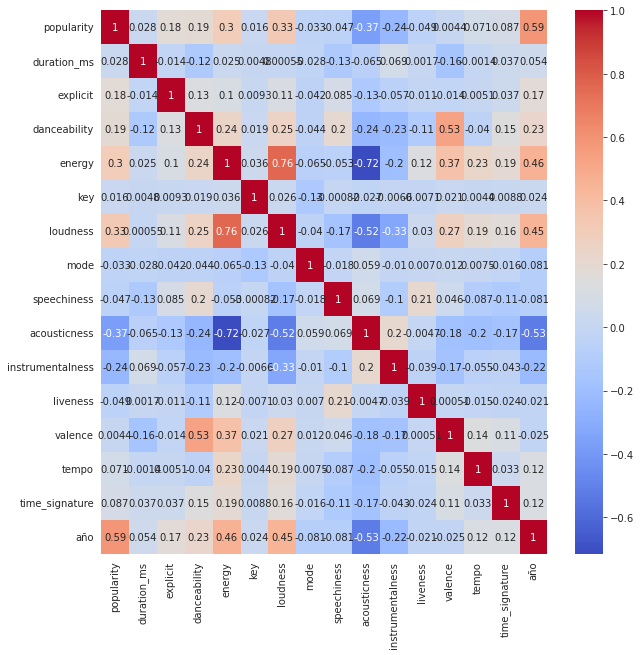

In [ ]:
# Creamos la gráfica de correlación
fig = plt.figure(figsize=(10, 10))

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')

# Mostramos la gráfica
plt.show()

#### Release_date

In [ ]:
df_tracks_Date1['release_date']=pd.to_datetime(df_tracks_Date1['release_date'])

In [ ]:
frec=df_tracks_Date1['release_date'].dt.year.value_counts()
frec

2020.0    13936
1999.0    12484
1998.0    12484
1997.0    12349
1996.0    12058
          ...  
1925.0      903
1923.0      655
1924.0      633
1922.0      294
1900.0        1
Name: release_date, Length: 101, dtype: int64

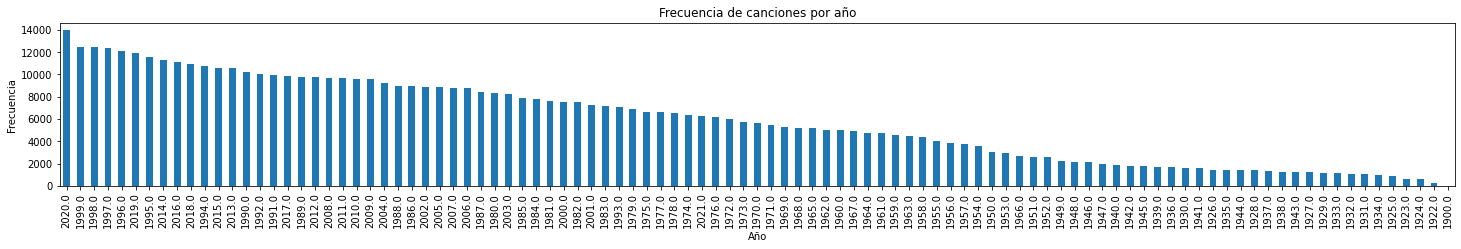

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 3))

# Hacemos un plot de barras de la frecuencia de cada año
frec.plot(kind='bar')

# Configuramos el título y los labels de los ejes
plt.title('Frecuencia de canciones por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostramos el plot
plt.show()

In [ ]:
# Detecting duplicates by "ID" column
duplicates_by_id = df_tracks.loc[df_tracks["id"].duplicated(keep = False)]

In [ ]:
duplicates_by_id.shape

(0, 21)

#### Duration_ms

<AxesSubplot:>

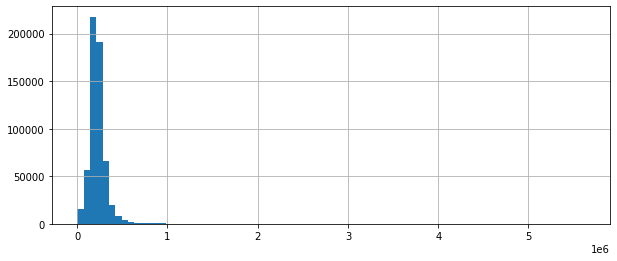

In [ ]:
# Using a histogram for showing the distribution of a column
plt.figure(figsize=(10, 4))
df_tracks["duration_ms"].hist(bins=80)

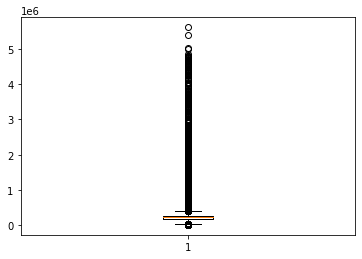

In [ ]:
df_tracks['duration_ms'] = df_tracks['duration_ms'].astype('float64')
plt.boxplot(df_tracks["duration_ms"])
plt.show()

####Popularity

In [ ]:
df_tracks_Date1['popularity'].unique

<bound method Series.unique of 0          6.0
1          0.0
2          0.0
3          NaN
4          0.0
          ... 
586667    50.0
586668    72.0
586669    70.0
586670    58.0
586671     NaN
Name: popularity, Length: 586672, dtype: float64>

In [ ]:
bins = [0,10,20, 30, 40, 50, 60, 70,80,90,100]
labels = ['0-10','11-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90-99']
df_tracks_Date1['pop'] = pd.cut(df_tracks_Date1['popularity'], bins=bins, labels=labels)

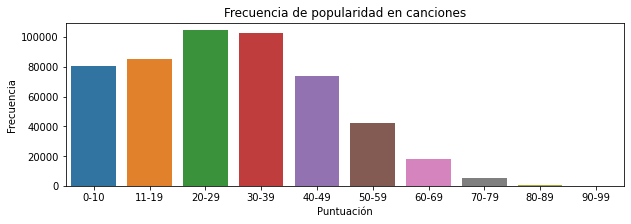

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.countplot(data=df_tracks_Date1, x='pop')

# Configuramos el título y los labels de los ejes
plt.title('Frecuencia de popularidad en canciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

#### Artists

In [ ]:
# filtrar por aquellos cuyo año sea mayor al año 2000
dt_filter = df_tracks_Date1.loc[df_tracks_Date1['año'] > 2010]

In [ ]:
#Agrupar el DataFrame por año y artista, y contar el número de veces que cada artista aparece en cada año
conteo_artistas_por_anio = dt_filter.groupby(['año', 'artists']).size().reset_index(name='conteo')
conteo_artistas_por_anio

,año,artists,conteo
0,2011.0,"[""Alex D'Elia"", 'Nihil Young']",1
1,2011.0,"[""Amerika'n Sound""]",2
2,2011.0,"[""Band'Eros""]",1
3,2011.0,"[""Ce'Cile"", 'Sasco']",1
4,2011.0,"[""Che'Nelle""]",4
...,...,...,...
64780,2021.0,"['王忻辰', '苏星婕']",1
64781,2021.0,['胡學軒'],1
64782,2021.0,['陳卓賢 Ian'],1
64783,2021.0,['高爾宣 OSN'],1


In [ ]:
# Seleccionar los 2 artistas más populares para cada año
artistas_mas_sonados_por_anio = conteo_artistas_por_anio.sort_values(['año', 'conteo'], ascending=[True, False]).groupby('año').head(2)
artistas_mas_sonados_por_anio

,año,artists,conteo
575,2011.0,['Bill Anderson'],126
1319,2011.0,['Edgar Broughton Band'],55
7343,2012.0,['Lana Del Rey'],68
7191,2012.0,['Kevin Ayers'],58
14593,2013.0,['The Beta Band'],82
13848,2013.0,['Ramones'],55
18797,2014.0,['Mike & The Mechanics'],63
17907,2014.0,['Joy/Disaster'],57
25371,2015.0,"['Roy Orbison', 'Alex Orbison', 'Chuck Turner']",146
22322,2015.0,['David Bowie'],84


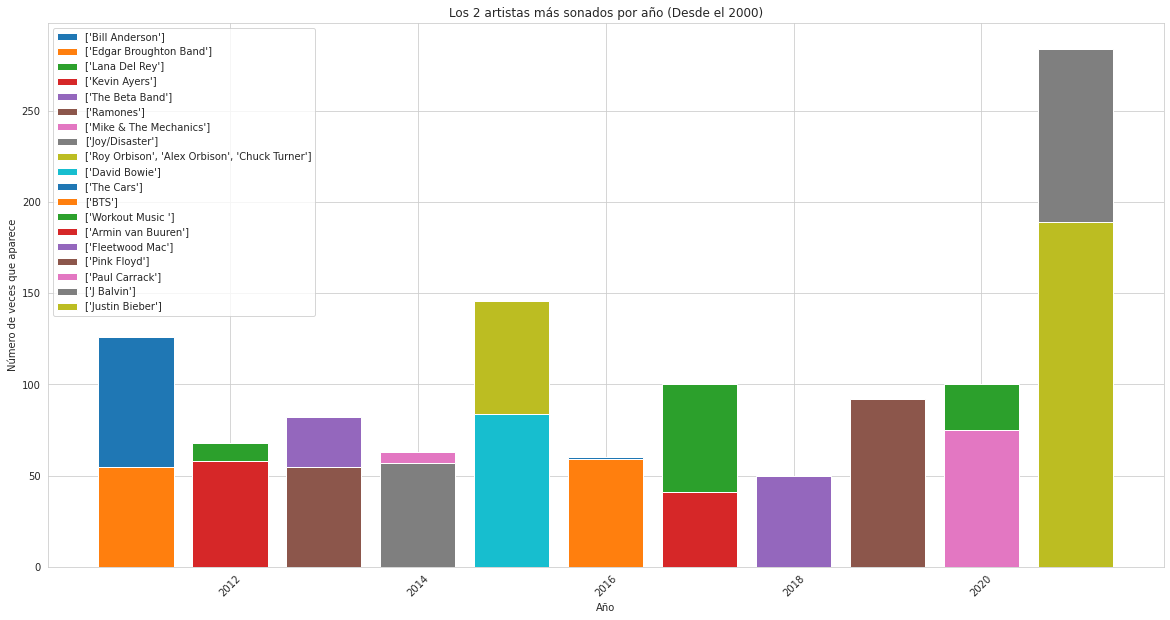

In [ ]:
# Crear una gráfica de barras con el número de veces que cada artista aparece por año
fig = plt.figure(figsize=(20,10))
for artista in artistas_mas_sonados_por_anio['artists'].unique():
    datos_artista = artistas_mas_sonados_por_anio[artistas_mas_sonados_por_anio['artists'] == artista]
    plt.bar(datos_artista['año'], datos_artista['conteo'], label=artista)
  
# Establecer los títulos y etiquetas de los ejes
plt.title('Los 2 artistas más sonados por año (Desde el 2000)')
plt.xlabel('Año')
plt.ylabel('Número de veces que aparece')

# Rotar los ticks del eje x para que sean legibles
plt.xticks(rotation=45)

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

In [ ]:
# filtrar por aquellos cuyo año sea mayor al año 2000
dt_filter = df_tracks_Date1.loc[df_tracks_Date1['año'] > 2000]

In [ ]:
#agrupa los datos por año y por nombre de artista, y calcula la media de la puntuación
df_artistas_anio = dt_filter.groupby(['año', 'artists'])['popularity'].mean().reset_index()
df_artistas_anio

,año,artists,popularity
0,2001.0,"[""Barbie's Cradle""]",39.0
1,2001.0,"[""Bomfunk MC's""]",34.0
2,2001.0,"[""Bro'Sis""]",49.0
3,2001.0,"[""Caedmon's Call""]",30.0
4,2001.0,"[""Compton's Most Wanted""]",50.0
...,...,...,...
105228,2021.0,"['王忻辰', '苏星婕']",61.0
105229,2021.0,['胡學軒'],42.0
105230,2021.0,['陳卓賢 Ian'],53.0
105231,2021.0,['高爾宣 OSN'],52.0


In [ ]:
# ordena los datos en orden descendente de puntuación para cada año
df_artistas_populares = df_artistas_anio.sort_values(['año', 'popularity'], ascending=[True, False]).groupby('año').head(5)
df_artistas_populares

,año,artists,popularity
2785,2001.0,['Train'],79.0
881,2001.0,"['Fat Joe', 'Ja Rule', 'Ashanti']",75.0
15,2001.0,"[""Gigi D'Agostino""]",74.0
1184,2001.0,"['Ja Rule', 'Ashanti']",74.0
1407,2001.0,"['Kid Rock', 'Sheryl Crow']",70.0
...,...,...,...
104074,2021.0,['Masked Wolf'],98.0
103895,2021.0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94.0
104531,2021.0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",94.0
104228,2021.0,"['Nathan Evans', '220 KID', 'Billen Ted']",92.0


In [ ]:
#Toma el primer registro de cada año, que tendrá el artista con mayor puntuación:
#top_artistas_anio = df_artistas_anio.drop_duplicates(subset=['año']).reset_index(drop=True)

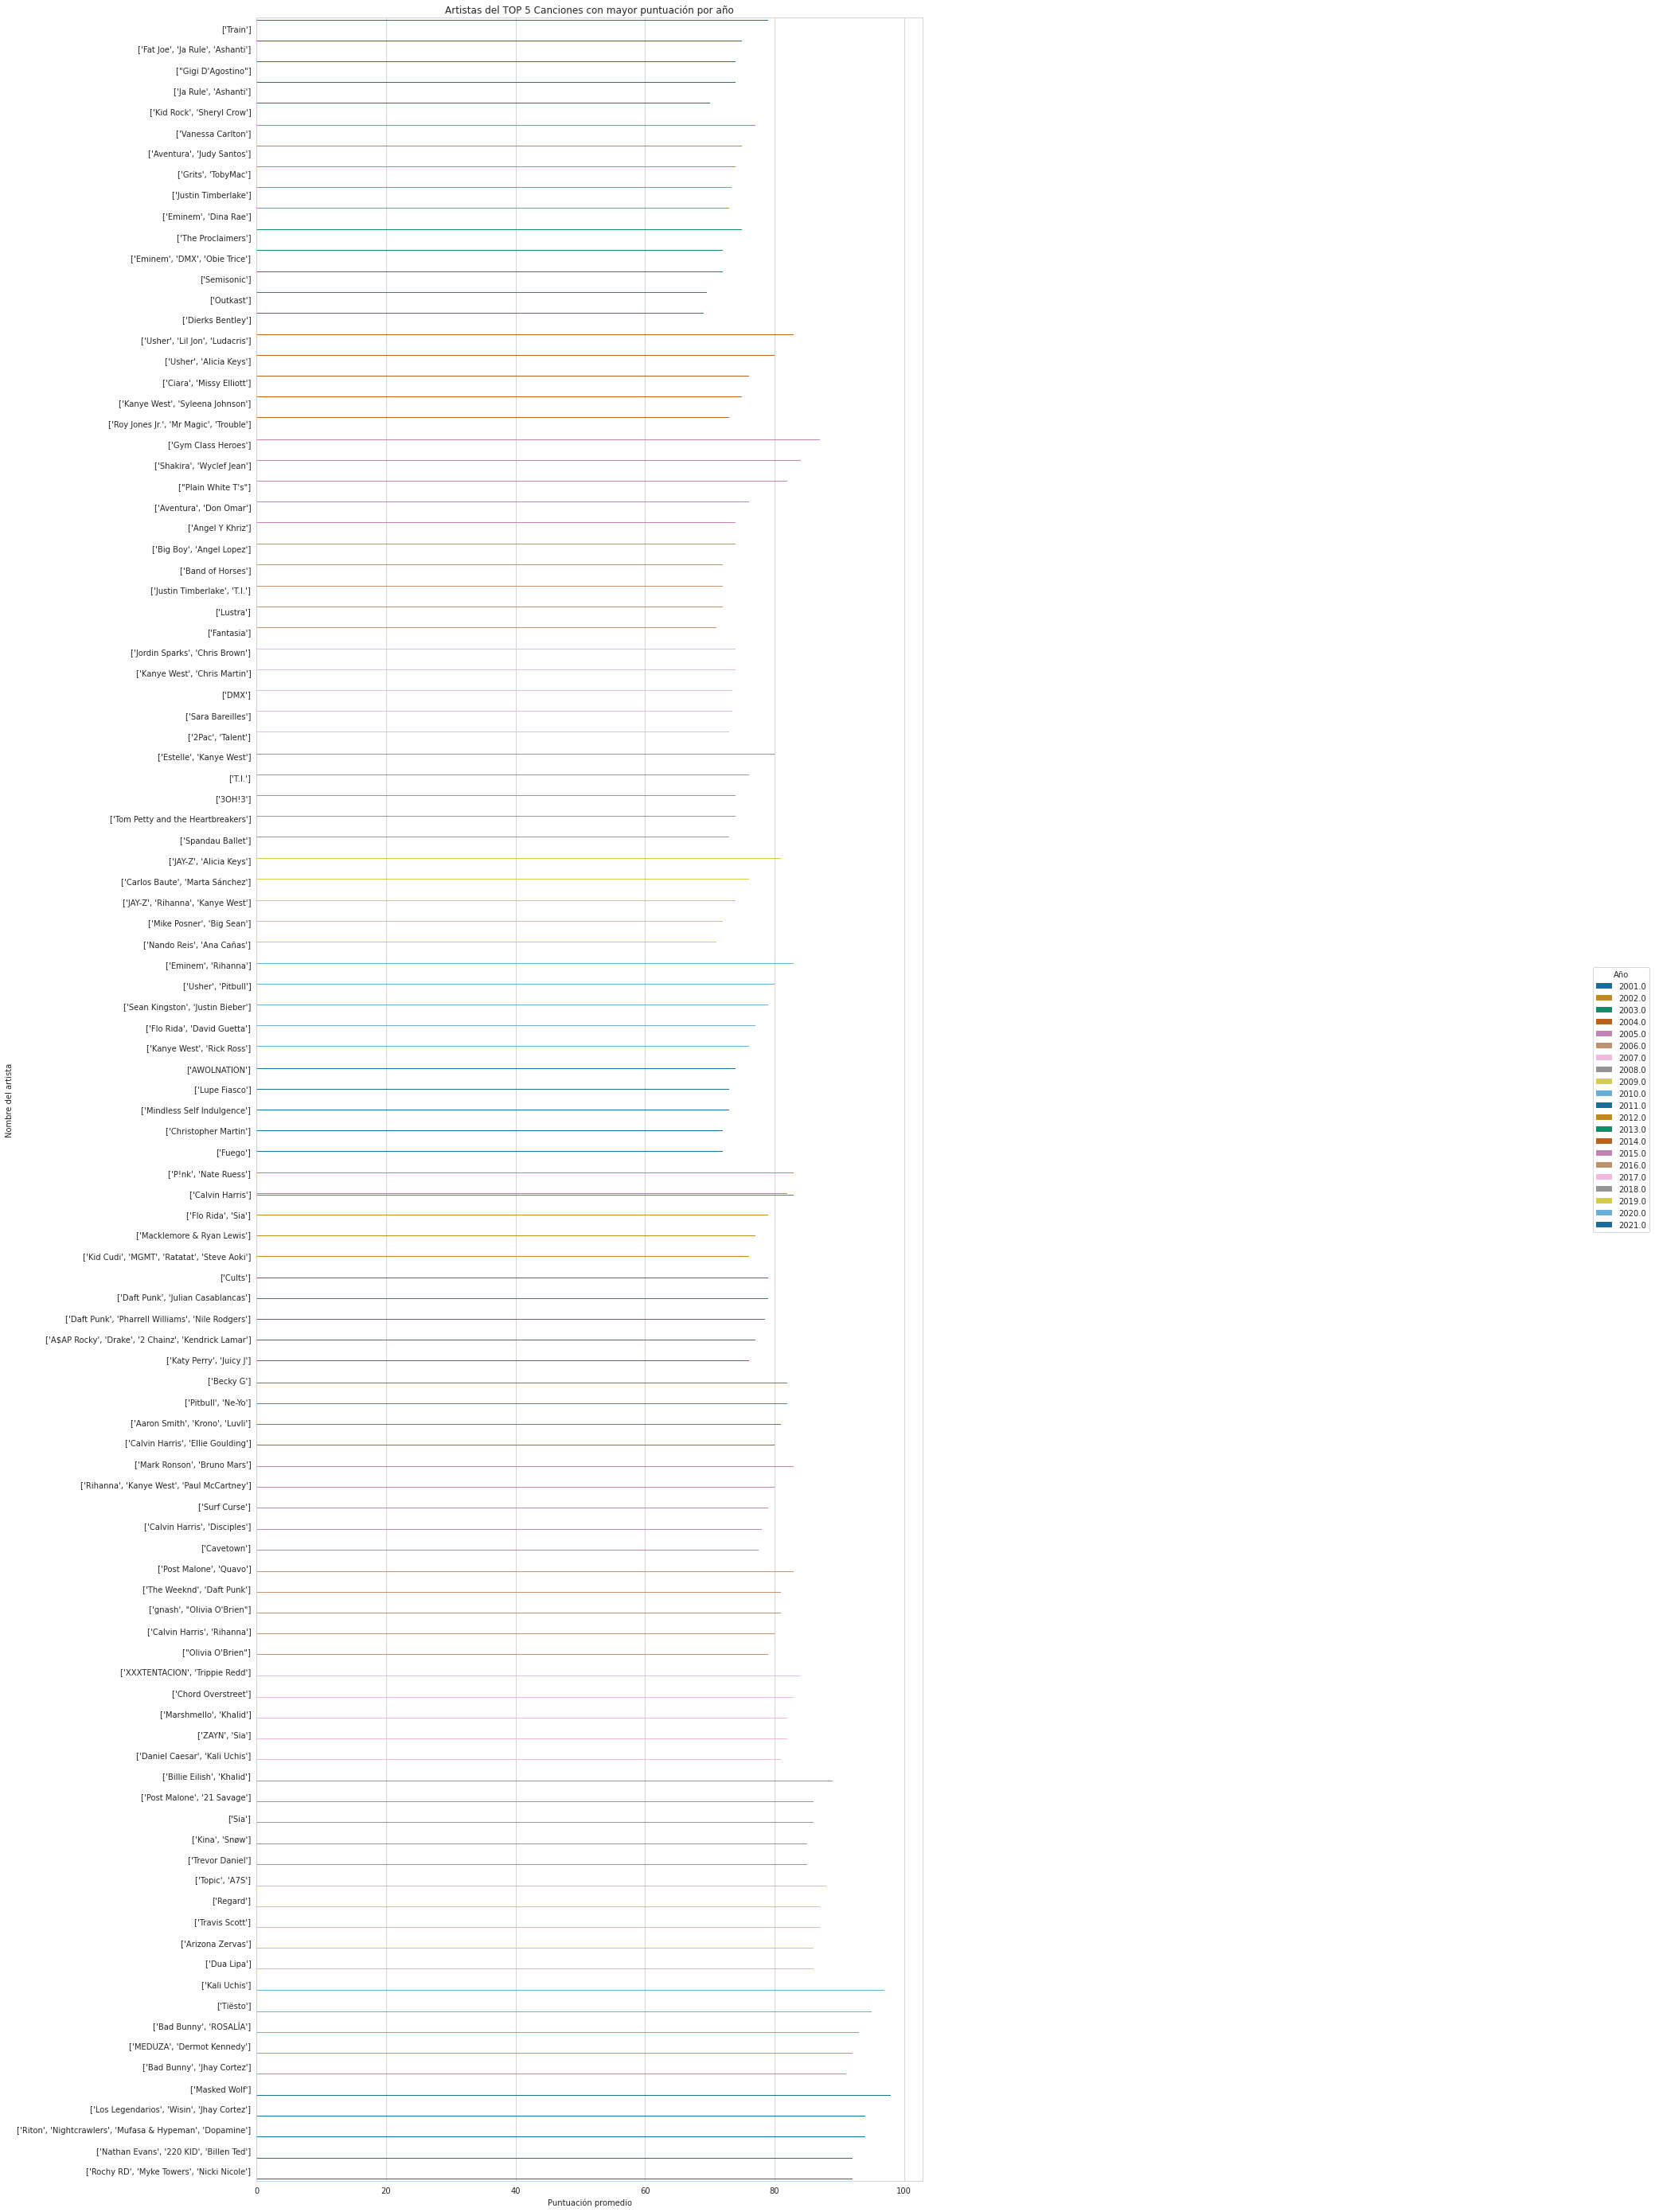

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,50))
sns.barplot(x='popularity', y='artists', hue='año', data=df_artistas_populares, linewidth=0.02, palette='colorblind')

plt.title('Artistas del TOP 5 Canciones con mayor puntuación por año')
plt.xlabel('Puntuación promedio')
plt.ylabel('Nombre del artista')
plt.legend(title='Año', loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()

key	loudness	mode	speechiness	acousticness

#KEY

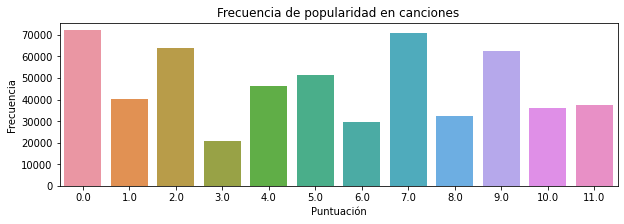

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.countplot(data=df_tracks, x='key')

# Configuramos el título y los labels de los ejes
plt.title('Frecuencia de key en canciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

#Loudness

Text(0.5, 1.0, 'loudness')

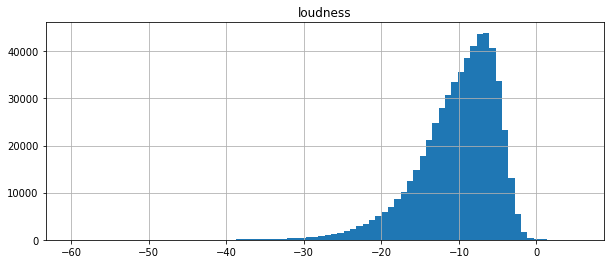

In [ ]:
plt.figure(figsize=(10, 4))
df_tracks["loudness"].hist(bins=80)
plt.title('loudness')

#mode

Text(0.5, 1.0, 'mode')

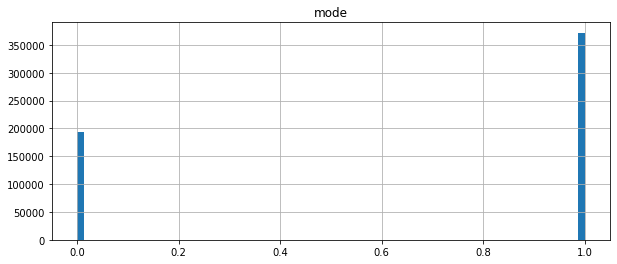

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.countplot(data=df_tracks, x='mode')

# Configuramos el título y los labels de los ejes
plt.title('Frecuencia de mode en canciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

#speechiness

Text(0.5, 1.0, 'speechiness')

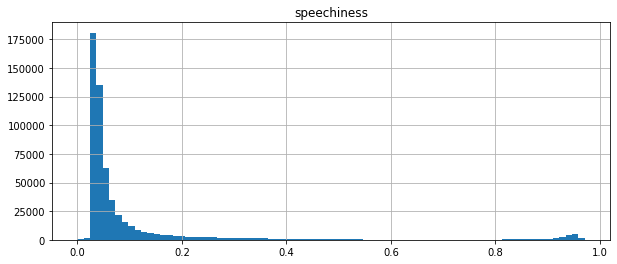

In [ ]:
plt.figure(figsize=(10, 4))
df_tracks["speechiness"].hist(bins=80)
plt.title('speechiness')

# Acousticness

Text(0.5, 1.0, 'acousticness')

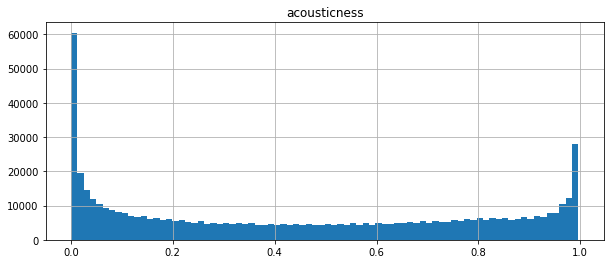

In [ ]:
plt.figure(figsize=(10, 4))
df_tracks["acousticness"].hist(bins=80)
plt.title('acousticness')

#Instrumentaleness


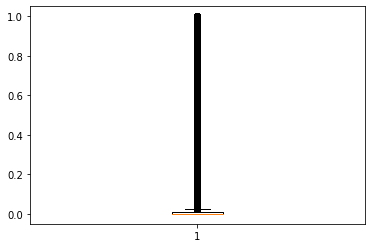

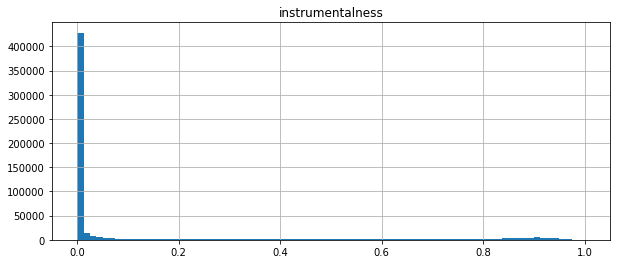

In [ ]:
plt.boxplot(df_tracks["instrumentalness"].dropna())
plt.show()
plt.figure(figsize=(10, 4))
df_tracks["instrumentalness"].hist(bins=80)
plt.title('instrumentalness')
plt.show()

#liveness


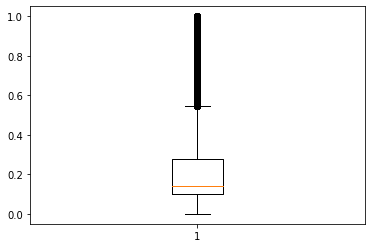

Text(0.5, 1.0, 'liveness')

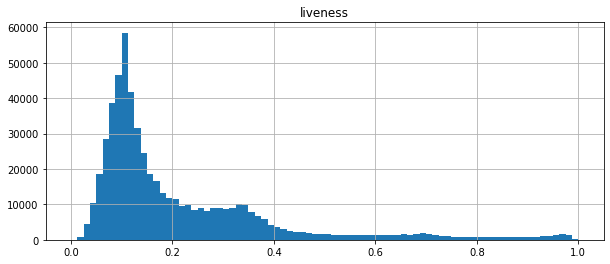

In [ ]:
plt.boxplot(df_tracks["liveness"].dropna())
plt.show()

plt.figure(figsize=(10, 4))
df_tracks["liveness"].hist(bins=80)
plt.title('liveness')

#valence

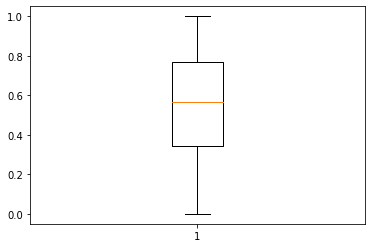

Text(0.5, 1.0, 'valence')

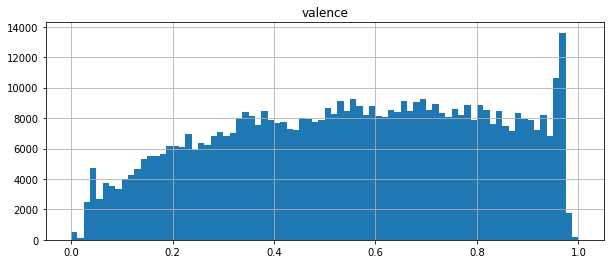

In [ ]:
plt.boxplot(df_tracks["valence"].dropna())
plt.show()
plt.figure(figsize=(10, 4))
df_tracks["valence"].hist(bins=80)
plt.title('valence')

#Tempo

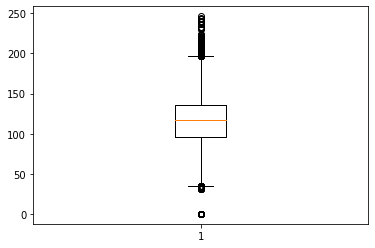

Text(0.5, 1.0, 'tempo')

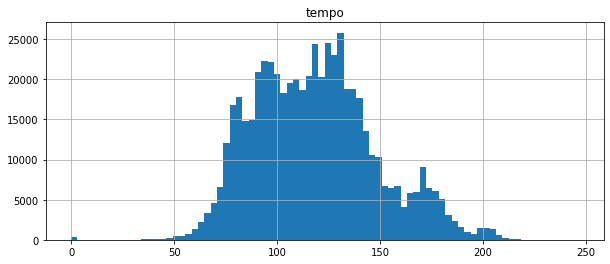

In [ ]:
plt.boxplot(df_tracks["tempo"].dropna())
plt.show()
plt.figure(figsize=(10, 4))
df_tracks["tempo"].hist(bins=80)
plt.title('tempo')

#Time signature

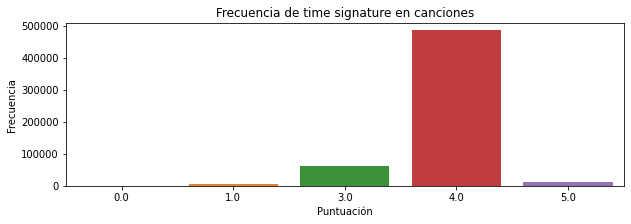

In [ ]:
fig = plt.figure(figsize=(10, 3))
sns.countplot(data=df_tracks, x='time_signature')

# Configuramos el título y los labels de los ejes
plt.title('Frecuencia de time signature en canciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()